In [2]:
import requests
import nltk
from bs4 import BeautifulSoup
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import spacy
import re
import pandas as pd
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import heapq

In [3]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Russell\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
nltk.download('punkt')
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Russell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Russell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Russell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
r = requests.get("https://www.who.int/news-room/fact-sheets/detail/marburg-virus-disease")
r.encoding = 'utf-8'
html = r.text
soup = BeautifulSoup(html, 'html.parser')

In [6]:
paragraphs = ''
for paragraph in soup.find_all('p'):
    paragraphs += paragraph.text

In [7]:
#remove digits in square brackets and new lines
patterns = [r'\[\d+\]', r'\n']
for pattern in patterns:
    paragraphs = re.sub(pattern, '', paragraphs)

In [8]:
def clean_text(text):
    sentences = sent_tokenize(text)
    text = text.lower()
    text = word_tokenize(text)
    text = [word for word in text if word not in stopwords.words('english')]
    text =[word for word in text if word not in string.punctuation]
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    
    return text, sentences

In [9]:
tokenized_text, sentences = clean_text(paragraphs)

In [10]:

nlp = spacy.load('en_core_web_sm')
doc = nlp(paragraphs)


In [11]:
countries = []
animals = []
for ent in doc.ents:
    if ent.label_ == 'GPE':
        countries.append(ent.text)
    if ent.label_ == 'ANIMAL':
        animals.append(ent.text)
print(countries)
print(animals)

['Marburg', 'Frankfurt', 'Germany', 'Belgrade', 'Serbia', 'Marburg', 'Frankfurt', 'Germany', 'Belgrade', 'Serbia', 'Uganda', 'Angola', 'the Democratic Republic of the', 'Congo', 'Kenya', 'South Africa', 'Zimbabwe', 'Uganda', 'Uganda', 'Marburg', 'Zaire', 'Uganda']
[]


In [12]:
word_counts = Counter(tokenized_text)

In [13]:
most_common_words = word_counts.most_common(15)
print(most_common_words)

[('marburg', 26), ('virus', 26), ('disease', 15), ('outbreak', 13), ('patient', 12), ('infection', 12), ('mvd', 11), ('contact', 11), ('semen', 10), ('practice', 8), ('sexual', 8), ('case', 7), ('infected', 7), ('severe', 7), ('survivor', 7)]


In [14]:
def plot_10_most_common_words(most_common_words):
    words, counts = list(zip(*most_common_words))
    plt.barh(words, counts)
    plt.savefig('static/images/10_most_common_words.png')
    plt.show()

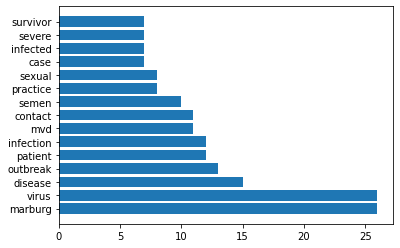

In [15]:
plot_10_most_common_words(most_common_words)

In [16]:
links_in_text = []
relevant_links = []
for link in soup.find_all('a'):
    links_in_text.append(link.get('href'))

for link in links_in_text:
    if re.match(r'^https://', link):
        relevant_links.append(link)
       
print(relevant_links)

['https://www.who.int/', 'https://www.who.int/', 'https://www.afro.who.int/', 'https://www.paho.org/hq/index.php?lang=en', 'https://www.who.int/southeastasia', 'https://www.who.int/europe/', 'https://www.who.int/westernpacific/', 'https://www.who.int/publications-detail-redirect/WHO-HSE-PED-CED-2014.05', 'https://www.who.int/publications-detail-redirect/WHO-HIS-SDS-2014.4-Rev.1', 'https://www.who.int/entity/csr/don/archive/disease/marburg_virus_disease/en/index.html', 'https://www.who.int/topics/haemorrhagic_fevers_viral/en/index.html', 'https://www.who.int/publications-detail-redirect/WHO-HIS-SDS-2014.4-Rev.1', 'https://www.who.int/publications/m/item/standard-precautions-in-health-care', 'https://www.who.int/news/item/09-08-2021-west-africa-s-first-ever-case-of-marburg-virus-disease-confirmed-in-guinea', 'https://www.youtube.com/user/who?sub_confirmation=1', 'https://twitter.com/intent/follow?source=followbutton&variant=1.0&screen_name=who', 'https://www.facebook.com/WHO', 'https://i

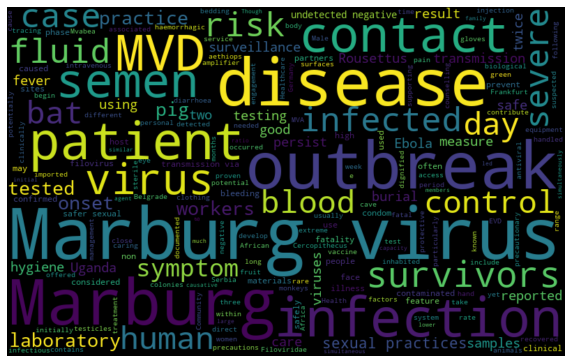

In [17]:
#prepare data for wordcloud
text = ''
for sentence in sentences:
    text += sentence

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('static/images/keywordcloud.png')
plt.show()

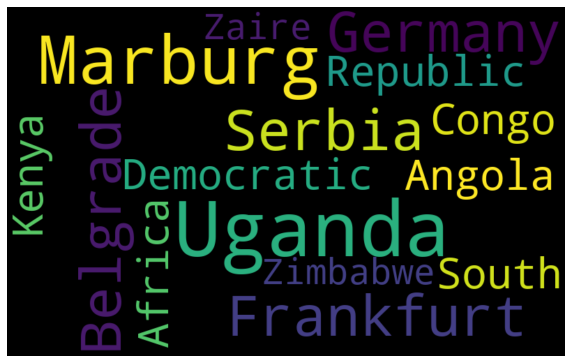

In [18]:
#wordcloud for countries
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(countries))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('static/images/keywordcloud_countries.png')
plt.show()

In [59]:
sentence_count = {}
for sentence in sentences:
    sentence_count[sentence] = len(sentence.split(' '))

In [83]:
#create dataframe with sentence and sentence length
df_sentences = pd.DataFrame.from_dict(sentence_count, orient='index')
#sort dataframe by sentence length
df_sentences.sort_values(by=0, ascending=False, inplace=True)

In [85]:
df_sentences = df_sentences.rename(columns={0: 'sentence_length'})

In [86]:
print(df_sentences[:10])

                                                    sentence_length
All Marburg survivors and their sexual partners...              147
Transmission via contaminated injection equipme...               81
In 2008, two independent cases were reported in...               68
These include basic hand hygiene, respiratory h...               66
These sites include the testicles and the insid...               63
As a result, the geographic distribution of Mar...               59
The following document provides overall guidanc...               53
Although no other domestic animals have yet bee...               49
In the 1967 European outbreak, non-itchy rash w...               46
When in close contact (within 1 metre) of patie...               43


In [90]:
top_5_sentences = heapq.nlargest(5, sentence_count, key=sentence_count.get)

In [98]:
abstract = '\n'.join(top_5_sentences)

In [99]:
print(abstract)

All Marburg survivors and their sexual partners should receive counselling to ensure safer sexual practices until their semen has twice tested negative for Marburg virus.Survivors should be provided with condoms.Marburg survivors and their sexual partners should either:abstain from all sexual practices, orobserve safer sexual practices through correct and consistent condom use until their semen has twice tested undetected (negative) for Marburg virus.Having tested undetected (negative), survivors can safely resume normal sexual practices with minimized risk of Marburg virus transmission.Male survivors of Marburg virus disease should practice safer sexual practices and hygiene for 12 months from onset of symptoms or until their semen twice tests undetected (negative) for Marburg virus.Until such time as their semen has twice tested undetected (negative) for Marburg, survivors should practice good hand and personal hygiene by immediately and thoroughly washing with soap and water after a